In [1]:
import pandas as pd
import numpy as np
import sklearn as sl
import seaborn as sns

import math as m

In [2]:
ds = pd.read_csv('./data/train.csv', index_col='id')
ds.head(3)

,word,stress,num_syllables,lemma
id,,,,
0,румяной,2,3,румяный
1,цифрами,1,3,цифра
2,слугами,1,3,слуга


In [3]:
ds_test = pd.read_csv('./data/test.csv', index_col='id')
ds_test.head(3)

,word,num_syllables,lemma
id,,,
0,эпилепсия,5,эпилепсия
1,относящейся,5,относиться
2,размышлениями,6,размышление


In [4]:
pd.set_option('display.max_rows', 10)
ds_test.describe()

,num_syllables
count,29960.000000
mean,3.482410
std,1.152522
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,6.000000


In [5]:
ds.describe()

,stress,num_syllables
count,63438.000000,63438.000000
mean,2.209354,3.489691
std,0.912874,1.158803
min,1.000000,1.000000
25%,2.000000,3.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,6.000000,6.000000


# Поиск шумов

In [6]:
ds_copy = ds.copy()

In [7]:
# «а» «у» «о» «и» «э» «ы» «я» «ю» «е» «ё»
vowels = ['а', 'е', 'ё', 'у', 'о', 'и', 'э', 'ы', 'ю', 'я']

#  Анализ данных

In [8]:
ds[1000:1030]

,word,stress,num_syllables,lemma
id,,,,
1000,тренировками,3,5,тренировка
1001,профиле,1,3,профиль
1002,звала,2,2,звать
1003,окружающими,3,6,окружающий
1004,трансплантации,3,5,трансплантация
...,...,...,...,...
1025,гибко,1,2,гибко
1026,протестующие,3,6,протестовать
1027,затянуло,3,4,затягивать


* можно на выход подавать номер слога
* можно на выход подавать номер ударной буквы, тогда НС будет как бы бинарно классифицировать падает ли на эту букву ударение

# Посчитаем длину слов

In [9]:
ds['words_lenght'] = [len(word) for word in ds['word']]
ds.sample(5)

,word,stress,num_syllables,lemma,words_lenght
id,,,,,
62045,подмигнув,3,3,подмигивать,9
30705,парламентского,2,5,парламентский,14
51473,отклонено,4,4,отклонять,9
12639,инструкциями,2,5,инструкция,12
62571,страховать,3,3,страховать,10


In [10]:
max_words_lenght = np.max(ds['words_lenght'])
max_words_lenght

20

In [11]:
ds['lemmas_lenght'] = [len(word) for word in ds['lemma']]
ds.sample(5)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
4378,японский,2,3,японский,8,8
22521,гусли,1,2,гусли,5,5
19315,специфические,3,6,специфический,13,13
34732,мотивацией,3,5,мотивация,10,9
34768,заглянули,3,4,заглядывать,9,11


In [12]:
max_lemms_lenght = np.max(ds['lemmas_lenght'])
max_lemms_lenght

20

In [13]:
min_lemms_lenght = np.min(ds['lemmas_lenght'])
min_lemms_lenght

2

In [14]:
ds.loc[ds['lemmas_lenght'] <= 2]

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
2994,уму,2,2,ум,3,2
4199,яру,1,2,яр,3,2
4738,ля,1,1,ля,2,2
6076,фе,1,1,фе,2,2
6191,ин,1,1,ин,2,2
...,...,...,...,...,...,...
59275,ша,1,1,ша,2,2
60673,мю,1,1,мю,2,2
61309,югу,1,2,юг,3,2


In [15]:
two_letter_words = ['еж', 'мы', 'уж', 'ус', 'яз', 'юг']

In [16]:
very_short_words = ds.loc[(ds['lemmas_lenght'] <= 2) & (~ds['lemma'].isin(two_letter_words))]

In [17]:
ds = ds.drop(index=very_short_words.index, axis=1)

In [18]:
bad_indexes = ds.loc[(ds['num_syllables'] == 1) & (~ds['lemma'].isin(two_letter_words))].index
ds = ds.drop(index=bad_indexes, axis=1)
len(bad_indexes)

1318

In [19]:
# pd.set_option('display.max_rows', None)
three_letters_words = ds.loc[(ds['lemmas_lenght'] == 3) & (ds['words_lenght'] == 3)]
three_letters_words

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
591,тыя,1,2,тыя,3,3
966,гаи,1,2,гаи,3,3
1047,эва,1,2,эва,3,3
1239,эла,1,2,эла,3,3
2054,ное,1,2,ной,3,3
...,...,...,...,...,...,...
62213,эго,1,2,эго,3,3
62526,абэ,1,2,абэ,3,3
62722,ама,1,2,ама,3,3


In [20]:
len(ds['word'].unique())

62043

In [21]:
len(ds['word'])

62043

In [22]:
ds.describe()

,stress,num_syllables,words_lenght,lemmas_lenght
count,62043.000000,62043.000000,62043.000000,62043.000000
mean,2.236417,3.545235,8.500492,8.387473
std,0.904789,1.110072,2.442989,2.567415
min,1.000000,1.000000,2.000000,2.000000
25%,2.000000,3.000000,7.000000,7.000000
50%,2.000000,3.000000,8.000000,8.000000
75%,3.000000,4.000000,10.000000,10.000000
max,6.000000,6.000000,20.000000,20.000000


In [23]:
ds.sample(1)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
19457,девичьего,2,4,девичий,9,7


<Axes: ylabel='Count'>

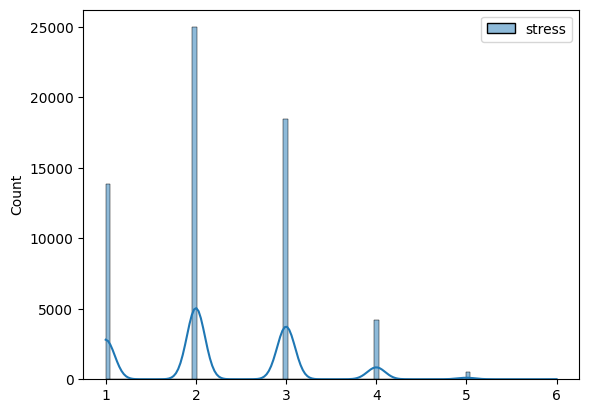

In [24]:
sns.histplot(data = {"stress": ds['stress']}, 
             kde=True)

In [25]:
len(ds.loc[ds['stress'] == 6])

24

In [26]:
len(ds.loc[ds['stress'] == 5])

535

In [27]:
len(ds.loc[ds['stress'] == 4])

4180

## Выяснение весов классов

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

In [29]:
# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(ds['stress']), y=ds['stress'])
class_weights

array([7.45744988e-01, 4.14199880e-01, 5.59762897e-01, 2.47380383e+00,
       1.93280374e+01, 4.30854167e+02])

In [30]:
ds.loc[ds['stress'] == 2]

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
0,румяной,2,3,румяный,7,7
5,купюру,2,3,купюра,6,6
7,культурной,2,3,культурный,10,10
9,маркерные,2,4,маркерный,9,9
11,кровавым,2,3,кровавый,8,8
...,...,...,...,...,...,...
63433,экзамена,2,4,экзамен,8,7
63434,культурой,2,3,культура,9,8
63435,объемной,2,3,объемный,8,8


## Балансировка даных в ручную

## Unsamplyng

In [31]:
ds.loc[ds['lemma'] == 'яшка']

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
360,яшка,2,2,яшка,4,4


In [32]:
df_empty = ds[0:0]
df_empty

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,


In [33]:
uniq_lemma_2 = np.unique(ds.loc[ds['stress'] == 2]['lemma'])
len(uniq_lemma_2)

9808

In [34]:
nds_2 = df_empty

In [35]:
for uniq_lemma in uniq_lemma_2:
    one_uniq_lemmas_word = ds.loc[(ds['lemma'] == uniq_lemma) & (ds['stress'] == 2)].sample(1)
    nds_2 = pd.concat([nds_2, one_uniq_lemmas_word], ignore_index=True, axis=0)
nds_2.reset_index(drop=True)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
0,аббас,2,2,аббас,5,5
1,аббат,2,2,аббат,5,5
2,аббатства,2,3,аббатство,9,9
3,абдул,2,2,абдул,5,5
4,абзацем,2,3,абзац,7,5
...,...,...,...,...,...,...
9803,ясна,2,2,ясный,4,5
9804,ясон,2,2,ясон,4,4
9805,ячейка,2,3,ячейка,6,6
9806,ячмень,2,2,ячмень,6,6


In [36]:
uniq_lemma_3 = np.unique(ds.loc[ds['stress'] == 3]['lemma'])
len(uniq_lemma_3)

7158

In [37]:
nds_3 = df_empty

In [38]:
for uniq_lemma in uniq_lemma_3:
    one_uniq_lemmas_word = ds.loc[(ds['lemma'] == uniq_lemma) & (ds['stress'] == 3)].sample(1)
    nds_3 = pd.concat([nds_3, one_uniq_lemmas_word], ignore_index=True, axis=0)
nds_3.reset_index(drop=True)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
0,аарона,3,4,аарон,6,5
1,абажуры,3,4,абажур,7,6
2,абаза,3,3,абаз,5,4
3,абганерово,3,5,абганерово,10,10
4,абдула,3,3,абдул,6,5
...,...,...,...,...,...,...
7153,ясновидящая,3,6,ясновидящая,11,11
7154,ясновидящие,3,6,ясновидящий,11,11
7155,ясногорск,3,3,ясногорск,9,9
7156,ястреба,3,3,ястреб,7,6


## Create a 1 class datas

In [39]:
uniq_lemma_1 = np.unique(ds.loc[ds['stress'] == 1]['lemma'])
len(uniq_lemma_1)

5827

In [40]:
nds_1 = df_empty

In [41]:
for uniq_lemma in uniq_lemma_1:
    try:
        one_uniq_lemmas_word = ds.loc[(ds['lemma'] == uniq_lemma) & (ds['stress'] == 1)].sample(2)
    except ValueError:
        one_uniq_lemmas_word = ds.loc[(ds['lemma'] == uniq_lemma) & (ds['stress'] == 1)].sample(1)
    nds_1 = pd.concat([nds_1, one_uniq_lemmas_word], ignore_index=True, axis=0)
nds_1.reset_index(drop=True)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
0,абхазия,1,4,абхазия,7,7
1,абхазию,1,4,абхазия,7,7
2,абэ,1,2,абэ,3,3
3,авва,1,2,авва,4,4
4,августу,1,3,август,7,6
...,...,...,...,...,...,...
8880,ящеры,1,3,ящер,5,4
8881,ящериц,1,3,ящерица,6,7
8882,ящерицы,1,4,ящерица,7,7
8883,ящике,1,3,ящик,5,4


## Create new DS with 1 and new 2 and 3 classes

In [42]:
nds = pd.concat([nds_1, nds_2, nds_3], ignore_index=True, axis=0)
nds = nds.reset_index(drop=True)

## Oversampling

In [43]:
words_with_4_s = ds.loc[ds['stress'] == 4].reset_index(drop=True)
for _ in range(0, int(10000/len(words_with_4_s))):
    nds = pd.concat([nds, words_with_4_s], ignore_index=True, axis=0)
    nds.reset_index(drop=True)

In [44]:
words_with_5_s = ds.loc[ds['stress'] == 5].reset_index(drop=True)

In [45]:
words_with_6_s = ds.loc[ds['stress'] == 6].reset_index(drop=True)

In [46]:
nds = pd.concat([nds, words_with_5_s, words_with_6_s], ignore_index=True, axis=0)
nds = nds.reset_index(drop=True)

In [47]:
words_with_5_s = ds.loc[ds['stress'] == 5].reset_index(drop=True)
for _ in range(0, int(10000/len(words_with_5_s))):
    nds = pd.concat([nds, words_with_5_s], ignore_index=True, axis=0)
    nds.reset_index(drop=True)

In [48]:
words_with_6_s = ds.loc[ds['stress'] == 6].reset_index(drop=True)
for _ in range(0, int(10000/len(words_with_6_s))):
    nds = pd.concat([nds, words_with_6_s], ignore_index=True, axis=0)
    nds.reset_index(drop=True)

<Axes: ylabel='Count'>

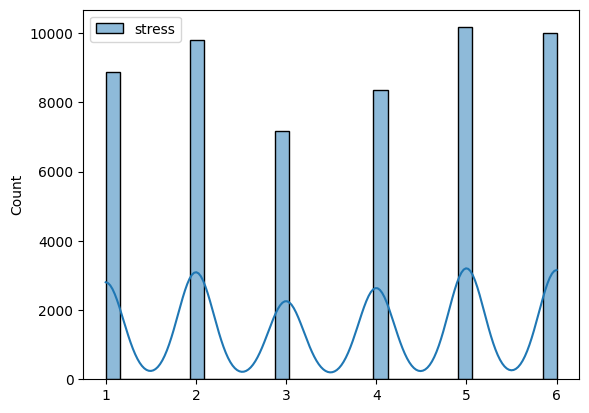

In [49]:
sns.histplot(data = {"stress": nds['stress']}, 
             kde=True)

<Axes: ylabel='Count'>

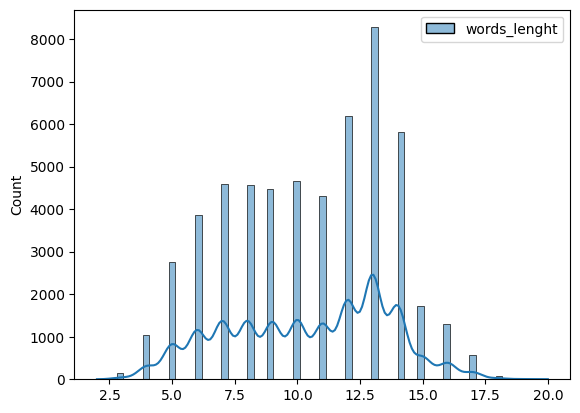

In [50]:
sns.histplot(data = {"words_lenght": nds['words_lenght']}, 
             kde=True)

In [51]:
nds.loc[nds['words_lenght'] == 13]

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
5,августовского,1,5,августовский,13,12
105,архангельском,1,4,архангельский,13,13
982,внутренностей,1,4,внутренность,13,12
1425,высвободиться,1,5,высвобождаться,13,14
2033,девственницей,1,4,девственница,13,12
...,...,...,...,...,...,...
54373,удовлетворены,6,6,удовлетворять,13,13
54375,литературовед,6,6,литературовед,13,13
54378,интернационал,6,6,интернационал,13,13
54379,академгородок,6,6,академгородок,13,13


### Old experiments

# Токенизируем слово и лемму

In [52]:
nds = pd.concat([nds, nds], ignore_index=True, axis=0)
ds = nds.reset_index(drop=True)

In [53]:
letter_list = ['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']
letter_by_number = {}
i = 1
for letter in letter_list:
    letter_by_number[letter] = i
    i+=1
letter_by_number

{'а': 1,
 'б': 2,
 'в': 3,
 'г': 4,
 'д': 5,
 'е': 6,
 'ё': 7,
 'ж': 8,
 'з': 9,
 'и': 10,
 'й': 11,
 'к': 12,
 'л': 13,
 'м': 14,
 'н': 15,
 'о': 16,
 'п': 17,
 'р': 18,
 'с': 19,
 'т': 20,
 'у': 21,
 'ф': 22,
 'х': 23,
 'ц': 24,
 'ч': 25,
 'ш': 26,
 'щ': 27,
 'ъ': 28,
 'ы': 29,
 'ь': 30,
 'э': 31,
 'ю': 32,
 'я': 33}

In [54]:
len(letter_by_number)

33

In [55]:
# Tokenize words
for i in range(0, max_words_lenght):
    ds[f'wl{i+1}'] = [(letter_by_number[word[i]] if len(word) > i else 0) for word in ds['word']]
    # is letter vowel?
    # ds[f'is_wl_v{i+1}'] = [(1 if (len(word) > i and word[i] in vowels) else 0) for word in ds['word']]
    # # How many vowels in the word?
    # i = 0
    # num_lemmas_syllables = 0
    # for id_ in ds['id']:
    #     word = ds.loc[ds['id'] == id_]['word']
    #     for letter in word:
    #         if letter in vowels:
    #             num_lemmas_syllables += 1
    #     ds.loc[ds['id'] == id_, 'num_lemmas_syllables'] = num_lemmas_syllables

In [56]:
# Tokenize lemms
for i in range(0, max_lemms_lenght):
    ds[f'll{i+1}'] = [(letter_by_number[lemma[i]] if len(lemma) > i else 0) for lemma in ds['lemma']]
    # is letter vowel?
    # ds[f'is_ll_v{i+1}'] = [(1 if (len(lemma) > i and lemma[i] in vowels) else 0) for lemma in ds['lemma']]

In [57]:
# pd.set_option('display.max_columns', None)
ds.sample(3)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght,wl1,wl2,wl3,wl4,...,ll11,ll12,ll13,ll14,ll15,ll16,ll17,ll18,ll19,ll20
74749,занавеску,3,4,занавеска,9,9,9,1,15,1,...,0,0,0,0,0,0,0,0,0,0
23800,придорожный,3,4,придорожный,11,11,17,18,10,5,...,11,0,0,0,0,0,0,0,0,0
91631,интеллектуальным,5,6,интеллектуальный,16,16,10,15,20,6,...,1,13,30,15,29,11,0,0,0,0


In [58]:
# pd.set_option('display.max_columns', None)
ds.drop(['word', 'lemma'], axis=1).corr()

,stress,num_syllables,words_lenght,lemmas_lenght,wl1,wl2,wl3,wl4,wl5,wl6,...,ll11,ll12,ll13,ll14,ll15,ll16,ll17,ll18,ll19,ll20
stress,1.000000,0.878059,0.804532,0.797148,0.086581,-0.040602,-0.083853,-0.105219,0.058804,0.125447,...,0.523348,0.488974,0.467586,0.360296,0.247283,0.155185,0.111680,0.025243,0.004247,0.002876
num_syllables,0.878059,1.000000,0.898054,0.864056,0.062404,-0.042441,-0.069525,-0.082742,0.066018,0.163883,...,0.563723,0.527783,0.477791,0.376737,0.258935,0.175452,0.113557,0.048759,0.020336,0.011981
words_lenght,0.804532,0.898054,1.000000,0.965192,0.078810,-0.023993,-0.037544,-0.035355,0.094460,0.205846,...,0.598941,0.599354,0.588376,0.517493,0.377004,0.316211,0.231245,0.102771,0.056606,0.033874
lemmas_lenght,0.797148,0.864056,0.965192,1.000000,0.076181,-0.029777,-0.034097,-0.049256,0.091863,0.195075,...,0.622451,0.612862,0.599027,0.559283,0.426698,0.339152,0.237081,0.113400,0.055042,0.034199
wl1,0.086581,0.062404,0.078810,0.076181,1.000000,-0.028925,-0.069493,-0.011378,0.067800,0.077477,...,0.074437,0.039386,0.077970,0.055115,-0.021900,0.053796,0.144908,0.018585,0.008417,0.006182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ll16,0.155185,0.175452,0.316211,0.339152,0.053796,0.059090,-0.011930,0.032828,0.066039,0.060893,...,0.107847,0.133988,0.217105,0.291515,0.497361,1.000000,0.524451,0.226859,0.055702,0.010765
ll17,0.111680,0.113557,0.231245,0.237081,0.144908,0.004435,-0.062959,0.014199,0.051834,0.035070,...,0.110621,0.084981,0.139294,0.185231,0.186798,0.524451,1.000000,0.364226,0.118660,0.078012
ll18,0.025243,0.048759,0.102771,0.113400,0.018585,0.005491,-0.016643,0.004474,0.006229,0.009407,...,0.039533,0.023816,0.034529,0.060957,0.100550,0.226859,0.364226,1.000000,0.247642,0.187454
ll19,0.004247,0.020336,0.056606,0.055042,0.008417,-0.000733,-0.000939,0.013679,0.013050,-0.002150,...,0.029350,0.013851,0.024904,0.033214,0.028021,0.055702,0.118660,0.247642,1.000000,0.585455


In [59]:
ds.drop(['word', 'lemma', 'words_lenght', 'lemmas_lenght'], axis=1).corr()['stress'].to_list()

[1.0,
 0.8780585424812524,
 0.08658111598556595,
 -0.04060185169184366,
 -0.08385319045321328,
 -0.10521930617280258,
 0.05880448433974679,
 0.12544694350242774,
 0.21853516363877837,
 0.3480572672012984,
 0.49631885671724096,
 0.5206887788678085,
 0.5016712897651141,
 0.543952354012592,
 0.4764742400115046,
 0.3496274912539515,
 0.173313273185499,
 0.15708264339851702,
 0.11275770144486132,
 0.02097753576904814,
 0.003938417755645575,
 0.0028102260609101514,
 0.0865366819778797,
 -0.03944048705259787,
 -0.08236477912808379,
 -0.08185437285960839,
 0.10399973041457168,
 0.15598095110205906,
 0.22571036953816817,
 0.327229355905615,
 0.46807479818654935,
 0.47925505760921794,
 0.5233484599782322,
 0.4889737997615489,
 0.46758598433144954,
 0.36029600515231064,
 0.24728315555395441,
 0.15518541927588098,
 0.11167970906851876,
 0.02524306157832654,
 0.004246585984690981,
 0.0028756114186000146]

# Prepare data

In [60]:
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, LeakyReLU, Conv1D, MaxPooling1D, Embedding, Flatten
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

2024-04-23 00:26:42.420514: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 00:26:42.424942: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 00:26:42.477472: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 00:26:43.668576: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [61]:
# ds_ = ds.drop(['id', 'word', 'lemma', 'words_lenght', 'lemmas_lenght'], axis=1)
ds_ = ds.drop(['word', 'lemma'], axis=1)
# ds_ = nds.drop(['word', 'lemma'], axis=1)

In [62]:
from sklearn.utils import shuffle
ds_ = shuffle(ds_)

In [63]:
# X, y = df.values[:, :-1], df.values[:, -1]
X = ds_.drop(['stress', 'num_syllables', 'words_lenght', 'lemmas_lenght'], axis=1)
# y = ds_['stress']

In [64]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
y = pd.DataFrame(encoder.fit_transform(ds_[['stress']]).toarray())
# y = pd.DataFrame(ds_[['stress']])

In [65]:
# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(ds_['stress']), y=ds_['stress'])
class_weights

array([1.02014631, 0.92414356, 1.2662755 , 1.08421053, 0.89168716,
       0.90567546])

In [66]:
i = 0
class_weights_dict = {}
for e in class_weights:
    class_weights_dict[e] = e
    i+=1

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)

In [68]:
pd.set_option('display.max_columns', None)
X_train

,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20,ll1,ll2,ll3,ll4,ll5,ll6,ll7,ll8,ll9,ll10,ll11,ll12,ll13,ll14,ll15,ll16,ll17,ll18,ll19,ll20
16607,19,12,1,14,6,6,25,12,21,0,0,0,0,0,0,0,0,0,0,0,19,12,1,14,6,6,25,12,1,0,0,0,0,0,0,0,0,0,0,0
51929,31,13,6,12,20,18,16,17,6,18,6,5,1,25,0,0,0,0,0,0,31,13,6,12,20,18,16,17,6,18,6,5,1,25,1,0,0,0,0,0
107889,18,6,3,16,13,32,24,10,16,15,6,18,0,0,0,0,0,0,0,0,18,6,3,16,13,32,24,10,16,15,6,18,0,0,0,0,0,0,0,0
83537,17,18,16,12,16,15,19,21,13,30,20,10,18,21,6,14,0,0,0,0,17,18,16,12,16,15,19,21,13,30,20,10,18,16,3,1,20,30,0,0
81740,17,6,18,10,17,6,20,10,10,0,0,0,0,0,0,0,0,0,0,0,17,6,18,10,17,6,20,10,33,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76133,15,1,18,12,16,13,16,4,10,33,0,0,0,0,0,0,0,0,0,0,15,1,18,12,16,13,16,4,10,33,0,0,0,0,0,0,0,0,0,0
42775,17,18,10,16,2,18,6,20,6,15,29,0,0,0,0,0,0,0,0,0,17,18,10,16,2,18,6,20,1,20,30,0,0,0,0,0,0,0,0,0
51488,9,1,18,6,12,16,14,6,15,5,16,3,1,13,0,0,0,0,0,0,9,1,18,6,12,16,14,6,15,5,16,3,1,20,30,0,0,0,0,0
30308,12,16,16,18,5,10,15,1,20,1,14,10,0,0,0,0,0,0,0,0,12,16,16,18,5,10,15,1,20,1,0,0,0,0,0,0,0,0,0,0


In [69]:
y_train

,0,1,2,3,4,5
42288,0.0,1.0,0.0,0.0,0.0,0.0
96412,0.0,0.0,0.0,0.0,0.0,1.0
29614,0.0,0.0,0.0,0.0,0.0,1.0
32932,0.0,0.0,0.0,1.0,0.0,0.0
70615,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
81549,0.0,0.0,1.0,0.0,0.0,0.0
11983,0.0,0.0,0.0,0.0,1.0,0.0
89758,0.0,0.0,0.0,0.0,0.0,1.0
36800,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
n_futures = len(X.columns)
n_futures

40

# Trying Ansables

# Trying AI

In [71]:
def get_model():
    # Create a model
    model = Sequential()
    
    # model.add(BatchNormalization())
    
    # Add input layer
    # model.add(Dense(83, activation='softmax', input_shape = (n_futures,) ))
    # model.add(Dense(100, activation='relu', input_shape = (n_futures,) ))
    model.add(Embedding(input_dim=n_futures*2, output_dim=40))
    
    # model.add(Dropout(0.1))
    # model.add(Dense(100, activation='relu'))
    
    model.add(Dropout(0.1))
    # model.add(Dropout(0.25))
    
    model.add(BatchNormalization())
    # model.add(Conv1D(filters=20 , kernel_size=4, strides=1, padding='same', activation='relu'))
    model.add(Conv1D(filters=20, kernel_size=10, strides=1, padding='same', activation='elu'))
    # model.add(MaxPooling1D(2))
    model.add(MaxPooling1D(1))
    
    # model.add(Dense(100, activation='relu', input_shape = (n_futures,) ))
    
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.1))
    # model.add(Dense(100, activation='relu'))
    # model.add(Dropout(0.1))
    # model.add(Dense(100, activation='relu'))
    
    # model.add(Conv1D(filters=20 , kernel_size=4, strides=1, padding='same', activation='relu'))
    # model.add(MaxPooling1D(2))
    # model.add(Dense(100, activation='relu'))
    
    # model.add(Dropout(0.2))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    
    # output layer
    model.add(Dense(6, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  # optimizer='adam', 
                  # optimizer='rmsprop',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'],
                 )
    return model

In [72]:
X

,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20,ll1,ll2,ll3,ll4,ll5,ll6,ll7,ll8,ll9,ll10,ll11,ll12,ll13,ll14,ll15,ll16,ll17,ll18,ll19,ll20
23228,17,16,5,25,10,15,6,15,15,29,11,0,0,0,0,0,0,0,0,0,17,16,5,25,10,15,6,15,15,29,11,0,0,0,0,0,0,0,0,0
84302,19,20,6,18,6,16,20,10,17,0,0,0,0,0,0,0,0,0,0,0,19,20,6,18,6,16,20,10,17,0,0,0,0,0,0,0,0,0,0,0
43741,17,6,18,6,17,16,5,4,16,20,16,3,12,21,0,0,0,0,0,0,17,6,18,6,17,16,5,4,16,20,16,3,12,1,0,0,0,0,0,0
85960,16,2,6,19,17,16,12,16,6,15,15,16,19,20,30,0,0,0,0,0,16,2,6,19,17,16,12,16,6,15,15,16,19,20,30,0,0,0,0,0
61463,19,20,6,18,13,10,15,4,16,3,0,0,0,0,0,0,0,0,0,0,19,20,6,18,13,10,15,4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50218,14,21,15,10,24,10,17,1,13,10,20,6,20,0,0,0,0,0,0,0,14,21,15,10,24,10,17,1,13,10,20,6,20,0,0,0,0,0,0,0
3200,12,15,10,8,6,25,12,21,0,0,0,0,0,0,0,0,0,0,0,0,12,15,10,8,6,25,12,1,0,0,0,0,0,0,0,0,0,0,0,0
22935,17,6,18,6,25,10,19,13,10,13,10,0,0,0,0,0,0,0,0,0,17,6,18,6,25,10,19,13,33,20,30,0,0,0,0,0,0,0,0,0
43103,17,6,18,6,21,2,6,5,10,20,30,0,0,0,0,0,0,0,0,0,17,6,18,6,21,2,6,8,5,1,20,30,0,0,0,0,0,0,0,0


# Get model trained on full data

In [73]:
model_f = get_model()

Epoch 1/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.7018 - loss: 0.7874
Epoch 2/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.8267 - loss: 0.4317
Epoch 3/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.8504 - loss: 0.3653
Epoch 4/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.8689 - loss: 0.3233
Epoch 5/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.8780 - loss: 0.2949
Epoch 6/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.8858 - loss: 0.2812
Epoch 7/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.8920 - loss: 0.2648
Epoch 8/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.8983 - loss: 0.2525
Epoch 9/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.8989 - loss: 0.2426
Epoch 10/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9030 - loss: 0.2380
Epoch 11/40
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9081 - loss: 0.2254
Epoch 12

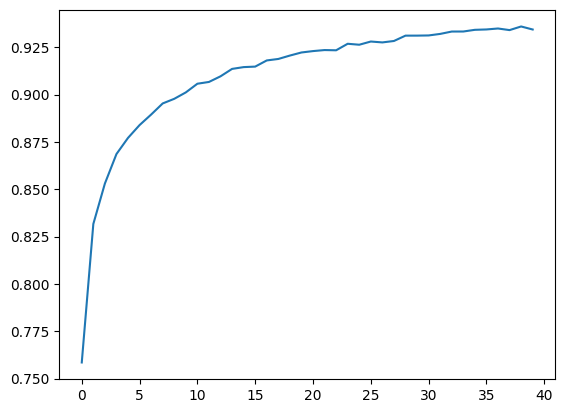

In [74]:
history_f=model_f.fit(X,
                  y,
                  batch_size=100,
                  epochs=40,
                  class_weight=class_weights_dict,
                  # Подавляем вывол протоколов обучения.
                  # verbose=0,
                  # Используем 20% обучающих данных для валидации.
                  # validation_split = 0.2)
                 )
plt.plot(history_f.history['accuracy'])
# plt.plot(history.history['hindle'])
plt.show()

In [75]:
model_f.save("./model/model.keras")

# Subbmission

In [76]:
ds_test = pd.read_csv('./data/test.csv', index_col='id')
ds_test.head(3)

,word,num_syllables,lemma
id,,,
0,эпилепсия,5,эпилепсия
1,относящейся,5,относиться
2,размышлениями,6,размышление


In [77]:
ds_test

,word,num_syllables,lemma
id,,,
0,эпилепсия,5,эпилепсия
1,относящейся,5,относиться
2,размышлениями,6,размышление
3,модемы,3,модем
4,солнц,1,солнце
...,...,...,...
29955,донбасса,3,донбасс
29956,обложка,3,обложка
29957,правителя,4,правитель


In [78]:
max_words_lenght = 20
# Tokenize words
for i in range(0, max_words_lenght):
    ds_test[f'wl{i+1}'] = [(letter_by_number[word[i]] if len(word) > i else 0) for word in ds_test['word']]
    # is letter vowel?
    # ds_test[f'is_wl_v{i+1}'] = [(1 if (len(word) > i and word[i] in vowels) else 0) for word in ds_test['word']]

In [79]:
max_words_lenght = 20
# Tokenize lemms
for i in range(0, max_lemms_lenght):
    ds_test[f'll{i+1}'] = [(letter_by_number[lemma[i]] if len(lemma) > i else 0) for lemma in ds_test['lemma']]
    # is letter vowel?
    # ds_test[f'is_ll_v{i+1}'] = [(1 if (len(lemma) > i and lemma[i] in vowels) else 0) for lemma in ds_test['lemma']]

In [80]:
ds_test_ = ds_test.drop(['word', 'lemma', 'num_syllables'], axis=1)

In [81]:
ds_test_

,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20,ll1,ll2,ll3,ll4,ll5,ll6,ll7,ll8,ll9,ll10,ll11,ll12,ll13,ll14,ll15,ll16,ll17,ll18,ll19,ll20
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,31,17,10,13,6,17,19,10,33,0,0,0,0,0,0,0,0,0,0,0,31,17,10,13,6,17,19,10,33,0,0,0,0,0,0,0,0,0,0,0
1,16,20,15,16,19,33,27,6,11,19,33,0,0,0,0,0,0,0,0,0,16,20,15,16,19,10,20,30,19,33,0,0,0,0,0,0,0,0,0,0
2,18,1,9,14,29,26,13,6,15,10,33,14,10,0,0,0,0,0,0,0,18,1,9,14,29,26,13,6,15,10,6,0,0,0,0,0,0,0,0,0
3,14,16,5,6,14,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,16,5,6,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19,16,13,15,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,16,13,15,24,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29955,5,16,15,2,1,19,19,1,0,0,0,0,0,0,0,0,0,0,0,0,5,16,15,2,1,19,19,0,0,0,0,0,0,0,0,0,0,0,0,0
29956,16,2,13,16,8,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,16,2,13,16,8,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0
29957,17,18,1,3,10,20,6,13,33,0,0,0,0,0,0,0,0,0,0,0,17,18,1,3,10,20,6,13,30,0,0,0,0,0,0,0,0,0,0,0


In [82]:
test_predictions_ = model_f.predict(ds_test_)

937/937 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [83]:
prediction = [np.argmax(p) + 1 for p in test_predictions_]

In [84]:
data = {'id': ds_test_.index, 'stress': prediction}
result = pd.DataFrame.from_dict(data)

In [85]:
result

,id,stress
0,0,3
1,1,3
2,2,3
3,3,2
4,4,1
...,...,...
29955,29955,2
29956,29956,2
29957,29957,2
29958,29958,3


In [86]:
result.to_csv("./data/test_result.csv", index=False)